In [1]:
import numpy as np
import matplotlib.pyplot as plt
import config
import scipy.constants as c

In [9]:
def compute_Omega_a_h_sq_err(theta_i, f_a, filename):
    path = config.data_path + "/" + filename
    samples = np.loadtxt(path)
    Omega_a_h_sq_err_MC = np.std(samples) # ok
    rho_err = config.parameter.rho_c * Omega_a_h_sq_err_MC / config.parameter.h**2 # ok
    rho_c_err = 5e-8 * config.parameter.h**2 * c.elementary_charge
    rho = np.mean(samples) * config.parameter.rho_c / config.parameter.h**2 # ok
    Omega_a_h_sq_err = (
        ((rho_err / config.parameter.rho_c)**2 + (rho_c_err * rho / config.parameter.rho_c**2)**2)**0.5 *
        config.parameter.h**2
    )
    rel_err = Omega_a_h_sq_err / np.mean(samples)
    plt.figure(figsize=(10,5))
    plt.title("num_samples = %i, $\\theta_i$ = %f, $f_a$ = %e GeV\n, std = %e, err = %e, rel err = %e" % 
              (samples.size, theta_i, f_a / 1e9, np.std(samples),
              Omega_a_h_sq_err, rel_err))
    plt.hist([samples], bins=20, density=False, fill=False, histtype="step")
    plt.xlabel(r"$\Omega_a h^2$")
    plt.ylabel("Count")
    # plt.savefig(config.plot_path + "/error_estimation_plot.pdf")

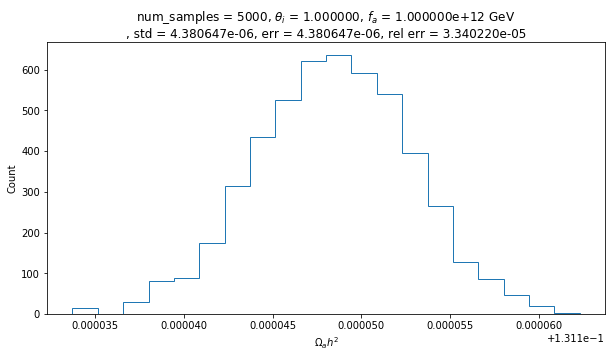

In [10]:
compute_Omega_a_h_sq_err(1, 1e12*1e9, "samples_theta1_fa_1e12.txt")

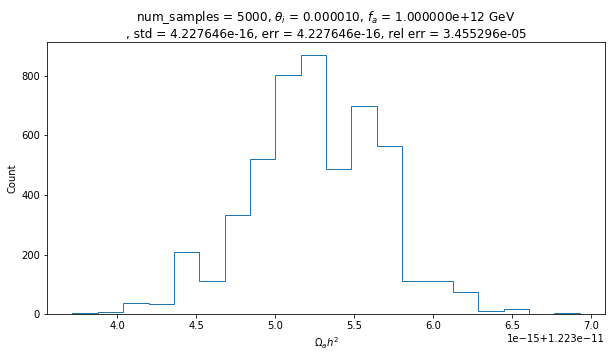

In [11]:
compute_Omega_a_h_sq_err(1e-5, 1e12*1e9, "samples_theta1e-5_f_a1e12.txt")

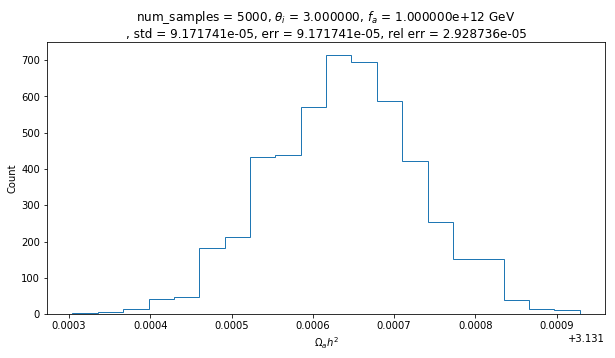

In [12]:
compute_Omega_a_h_sq_err(3, 1e12 * 1e9, "samples_theta3_fa_1e12.txt")

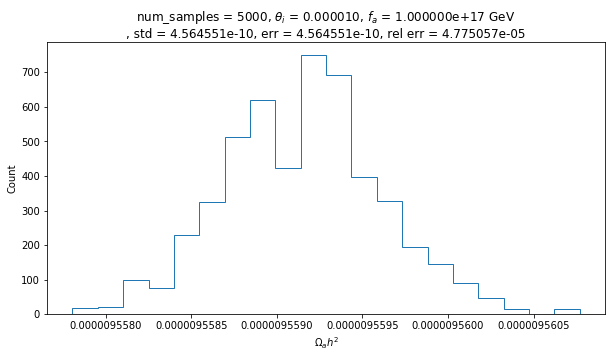

In [13]:
compute_Omega_a_h_sq_err(1e-5, 1e17 * 1e9, "samples_theta1e-5_fa_1e17.txt")

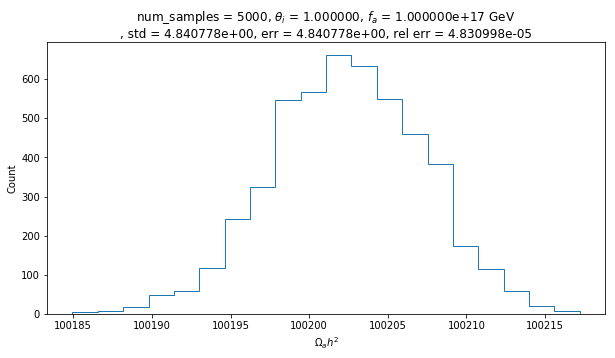

In [14]:
compute_Omega_a_h_sq_err(1, 1e17 * 1e9, "samples_theta1_fa_1e17.txt")

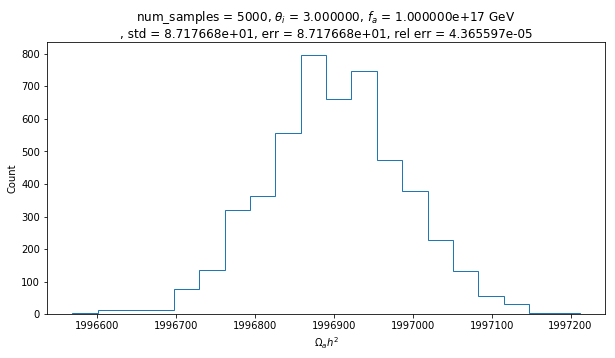

In [15]:
compute_Omega_a_h_sq_err(3, 1e17 * 1e9, "samples_theta_3_f_a_1e17.txt")